In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [2]:
roo = './roo1.csv'
df  = pd.read_csv(roo)

data      = df.copy()
train_set = data.sample(frac=0.80645)
test_set  = data.drop(train_set.index)

# print ('Training set')
# print (train_set.head())
# print ('\nTest set')
# print (test_set.head())
# print ('\nOriginal DataFrame')
# print (data.head())

print(train_set.shape,test_set.shape)

(16129, 127) (3871, 127)


In [3]:
X_train = train_set.iloc[:,:93]
Y_train = train_set.iloc[:,93:]

X_test  = test_set.iloc[:,:93]
Y_test  = test_set.iloc[:,93:]

In [4]:
# Explore your dataset 
m_train = X_train.shape[0] #no of train samples
n       = X_train.shape[1] #no of train features
m_test  = Y_train.shape[0] #no of test samples

print ("train_set shape            : " + str(train_set.shape))
print ("test_set shape             : " + str(test_set.shape))
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples : " + str(m_test))
print ("\n********************************************\n")
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
#print(X_train.head(5))

train_set shape            : (16129, 127)
test_set shape             : (3871, 127)
Number of training examples: 16129
Number of testing examples : 16129

********************************************

X_train shape: (16129, 93)
Y_train shape: (16129, 34)
X_test shape: (3871, 93)
Y_test shape: (3871, 34)


In [5]:
# Normalising the marks columns (1-9)
myu = [77.01426002852006, 76.98474796949594, 77.07384214768429, 77.12121024242049, 76.95790191580383, 77.01605803211606, 77.05654411308822, 76.90935581871163, 76.93328786657574]
sig = [77.67089701771499, 77.64407546751336, 77.73767831813130, 77.77726209249717, 77.60748318199020, 77.68706969992881, 77.71482937759954, 77.57664974896230, 77.59417367116924]
 #array contains variance of all train columns

for i in range(9):
    X_train.iloc[:,i] = (X_train.iloc[:,i] - myu[i])/sig[i]
    X_test.iloc[:,i] = (X_test.iloc[:,i] - myu[i])/sig[i]
    
print(X_train.head())

/home/sayali/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


       Acedamic percentage in Operating Systems  percentage in Algorithms  \
11456                                  0.038441                  0.206265   
16528                                  0.051316                  0.038834   
3253                                   0.192939                  0.180506   
18614                                  0.102815                 -0.012683   
1544                                  -0.219056                 -0.115717   

       Percentage in Programming Concepts  Percentage in Software Engineering  \
11456                            0.089097                            0.062728   
16528                           -0.103860                            0.152728   
3253                            -0.090996                            0.075585   
18614                            0.192007                           -0.117273   
1544                            -0.219634                            0.127014   

       Percentage in Computer Networks  Percentage

In [6]:
# GRADED FUNCTION: create_placeholders
#print(X_train.head())
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, no of features (93)
    n_y -- scalar, number of classes (34)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(dtype = "float32" , shape = (n_x,None) , name="X")
    Y = tf.placeholder(dtype = "float32" , shape = (n_y,None) , name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [7]:
#Tesing
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y:0", shape=(6, ?), dtype=float32)


In [23]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [50, 93]
                        b1 : [50, 1]
                        W2 : [45, 50]
                        b2 : [45, 1]
                        W3 : [40, 45]
                        b3 : [40, 1]
                        W4 : [38, 40]
                        b4 : [38, 1]
                        W5 : [36, 38]
                        b5 : [36, 1]
                        W6 : [34, 36]
                        b6 : [34, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [50, 93], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [50, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [45, 50], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [45, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [40, 45], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [40, 1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b4 = tf.get_variable("b4", [40, 1], initializer = tf.zeros_initializer())
    W5 = tf.get_variable("W5", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b5 = tf.get_variable("b5", [40, 1], initializer = tf.zeros_initializer())
    W6 = tf.get_variable("W6", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b6 = tf.get_variable("b6", [40, 1], initializer = tf.zeros_initializer())
    W7 = tf.get_variable("W7", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b7 = tf.get_variable("b7", [40, 1], initializer = tf.zeros_initializer())
    W8 = tf.get_variable("W8", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b8 = tf.get_variable("b8", [40, 1], initializer = tf.zeros_initializer())
    W9 = tf.get_variable("W9", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b9 = tf.get_variable("b9", [40, 1], initializer = tf.zeros_initializer())
    W10 = tf.get_variable("W10", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b10 = tf.get_variable("b10", [40, 1], initializer = tf.zeros_initializer())
    W11 = tf.get_variable("W11", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b11 = tf.get_variable("b11", [40, 1], initializer = tf.zeros_initializer())
    W12 = tf.get_variable("W12", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b12 = tf.get_variable("b12", [40, 1], initializer = tf.zeros_initializer())
    W13 = tf.get_variable("W13", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b13 = tf.get_variable("b13", [40, 1], initializer = tf.zeros_initializer())
    W14 = tf.get_variable("W14", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b14 = tf.get_variable("b14", [40, 1], initializer = tf.zeros_initializer())
    W15 = tf.get_variable("W15", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b15 = tf.get_variable("b15", [40, 1], initializer = tf.zeros_initializer())
    W16 = tf.get_variable("W16", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b16 = tf.get_variable("b16", [40, 1], initializer = tf.zeros_initializer())
    W17 = tf.get_variable("W17", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b17 = tf.get_variable("b17", [40, 1], initializer = tf.zeros_initializer())
    W18 = tf.get_variable("W18", [38, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b18 = tf.get_variable("b18", [38, 1], initializer = tf.zeros_initializer())
    W19 = tf.get_variable("W19", [36, 38], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b19 = tf.get_variable("b19", [36, 1], initializer = tf.zeros_initializer())
    W20 = tf.get_variable("W20", [34, 36], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b20 = tf.get_variable("b20", [34, 1], initializer = tf.zeros_initializer())
    
    ### END CODE HERE ###

    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2,"W3": W3,"b3": b3,"W4": W4,"b4": b4,
                  "W5": W5,"b5": b5,"W6": W6,"b6": b6,"W7": W7,"b7": b7,"W8": W8,"b8": b8,
                  "W9": W9,"b9": b9,"W10": W10,"b10": b10,"W11": W11,"b11": b11,"W12": W12,"b12": b12,
                  "W13": W13,"b13": b13,"W14": W14,"b14": b14,"W15": W15,"b15": b15,"W16": W16,"b16": b16,
                  "W17": W17,"b17": b17,"W18": W18,"b18": b18,"W19": W19,"b19": b19,"W20": W20,"b20": b20,
                  }
    
    return parameters

In [9]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
#     print("W3 = " + str(parameters["W3"]))
#     print("b3 = " + str(parameters["b3"]))
#     print("W4 = " + str(parameters["W4"]))
#     print("b4 = " + str(parameters["b4"]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = <tf.Variable 'W1:0' shape=(50, 93) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(50, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(45, 50) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(45, 1) dtype=float32_ref>


In [24]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    W6 = parameters['W6']
    b6 = parameters['b6']
    W7 = parameters['W7']
    b7 = parameters['b7']
    W8 = parameters['W8']
    b8 = parameters['b8']
    W9 = parameters['W9']
    b9 = parameters['b9']
    W10 = parameters['W10']
    b10 = parameters['b10']
    W11 = parameters['W11']
    b11 = parameters['b11']
    W12 = parameters['W12']
    b12 = parameters['b12']
    W13 = parameters['W13']
    b13 = parameters['b13']
    W14 = parameters['W14']
    b14 = parameters['b14']
    W15 = parameters['W15']
    b15 = parameters['b15']
    W16 = parameters['W16']
    b16 = parameters['b16']
    W17 = parameters['W17']
    b17 = parameters['b17']
    W18 = parameters['W18']
    b18 = parameters['b18']
    W19 = parameters['W19']
    b19 = parameters['b19']
    W20 = parameters['W20']
    b20 = parameters['b20']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                       # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                       # Z3 = np.dot(W3,a2) + b3
    A3 = tf.nn.relu(Z3)                                    # A3 = relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)                       # Z4 = np.dot(W4,a3) + b4
    A4 = tf.nn.relu(Z4)                                    # A4 = relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4),b5)                       # Z5 = np.dot(W5,a4) + b5
    A5 = tf.nn.relu(Z5)                                    # A5 = relu(Z5)
    Z6 = tf.add(tf.matmul(W6,A5),b6)                       # Z6 = np.dot(W6,a5) + b6
    A6 = tf.nn.relu(Z6)                                    # A5 = relu(Z5)
    Z7 = tf.add(tf.matmul(W7,A6),b7)                       # Z6 = np.dot(W6,a5) + b6
    A7 = tf.nn.relu(Z7)                                    # A5 = relu(Z5)
    Z8 = tf.add(tf.matmul(W8,A7),b8)                       # Z6 = np.dot(W6,a5) + b6
    A8 = tf.nn.relu(Z8)                                    # A5 = relu(Z5)
    Z9 = tf.add(tf.matmul(W9,A8),b9)
    A9 = tf.nn.relu(Z9)                                    # A5 = relu(Z5)
    Z10 = tf.add(tf.matmul(W10,A9),b10)
    A10 = tf.nn.relu(Z10)                                    # A5 = relu(Z5)
    Z11 = tf.add(tf.matmul(W11,A10),b11)
    A11 = tf.nn.relu(Z11)                                    # A5 = relu(Z5)
    Z12 = tf.add(tf.matmul(W12,A11),b12)
    A12 = tf.nn.relu(Z12)                                    # A5 = relu(Z5)
    Z13 = tf.add(tf.matmul(W13,A12),b13)
    A13 = tf.nn.relu(Z13)                                    # A5 = relu(Z5)
    Z14 = tf.add(tf.matmul(W14,A13),b14)
    A14 = tf.nn.relu(Z14)                                    # A5 = relu(Z5)
    Z15 = tf.add(tf.matmul(W15,A14),b15)
    A15 = tf.nn.relu(Z15)                                    # A5 = relu(Z5)
    Z16 = tf.add(tf.matmul(W16,A15),b16)
    A16 = tf.nn.relu(Z16)                                    # A5 = relu(Z5)
    Z17 = tf.add(tf.matmul(W17,A16),b17)
    A17 = tf.nn.relu(Z17)                                    # A5 = relu(Z5)
    Z18 = tf.add(tf.matmul(W18,A17),b18)
    A18 = tf.nn.relu(Z18)                                    # A5 = relu(Z5)
    Z19 = tf.add(tf.matmul(W19,A18),b19)
    A19 = tf.nn.relu(Z19)                                    # A5 = relu(Z5)
    Z20 = tf.add(tf.matmul(W20,A19),b20)
    ### END CODE HERE ###
    
    return Z20

In [45]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(93, 34)
    parameters = initialize_parameters()
    Z12 = forward_propagation(X, parameters)
    print("Z12 = " + str(Z12))

Z8 = Tensor("Add_7:0", shape=(34, ?), dtype=float32)


In [25]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z20, Y):
    """
    Computes the cost
    
    Arguments:
    Z4 -- output of forward propagation (output of the last LINEAR unit), of shape (34, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z4
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z20)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)...
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

    ### END CODE HERE ###
    
    return cost

In [47]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(93, 34)
    parameters = initialize_parameters()
    Z12 = forward_propagation(X, parameters)
    cost = compute_cost(Z12, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [26]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 512, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    k = 0
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X.iloc[:, permutation]
    shuffled_Y = Y.iloc[:, permutation]
#.reshape((1,m))
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X.iloc[:, k*mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y.iloc[:, k*mini_batch_size : (k+1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X.iloc[:, (k+1)*mini_batch_size :  ]
        mini_batch_Y = shuffled_Y.iloc[:, (k+1)*mini_batch_size :  ]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [13]:
# X_train = X_train.T
# Y_train = Y_train.T
# X_test  = X_test.T
# Y_test  = Y_test.T
# print(X_train.shape)
# print(Y_train.shape)

(93, 16129)
(34, 16129)


In [29]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001,
          num_epochs = 2000, minibatch_size = 102, print_cost = True):
    """
    Implements a four-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 93, number of training examples = 16129)
    Y_train -- test set, of shape (output size = 34, number of training examples = 16129)
    X_test -- training set, of shape (input size = 93, number of training examples = 3871)
    Y_test -- test set, of shape (output size = 34, number of test examples = 3871)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = tf.placeholder(dtype = "float32", shape=(n_x, None) , name="X"), tf.placeholder(dtype = "float32", shape=(n_y,None) , name="Y")
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    #print("here ",X.shape)
    Z20 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z20, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z20), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
        print ("Train Accuracy : ", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy  : ", accuracy.eval({X: X_test, Y: Y_test}))
        print ("Learning_rate  : ",learning_rate)
        return parameters

(93, 16129)
Cost after epoch 0: 3.637517
Cost after epoch 100: 3.093879
Cost after epoch 200: 2.804501
Cost after epoch 300: 2.590879
Cost after epoch 400: 2.524533
Cost after epoch 500: 2.366439
Cost after epoch 600: 2.345501
Cost after epoch 700: 2.318513
Cost after epoch 800: 2.256652
Cost after epoch 900: 2.257266
Cost after epoch 1000: 2.236304
Cost after epoch 1100: 2.160256
Cost after epoch 1200: 2.132820
Cost after epoch 1300: 2.190674
Cost after epoch 1400: 2.100132
Cost after epoch 1500: 2.122005
Cost after epoch 1600: 2.198519
Cost after epoch 1700: 2.285104
Cost after epoch 1800: 2.088538
Cost after epoch 1900: 2.065430


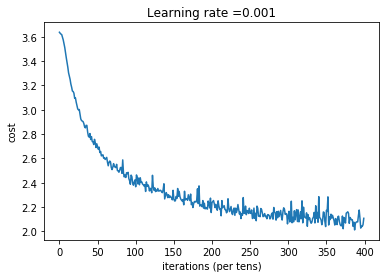

Parameters have been trained!
Train Accuracy :  0.37324074
Test Accuracy  :  0.028933093
Learning_rate  :  0.001


In [30]:
print(X_train.shape)
parameters = model(X_train, Y_train, X_test, Y_test)